In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('h8dsft_P1G4_Kenneth_Chondro.csv')

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [6]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [7]:
num=[]
for x in data.columns:
    if data[x].value_counts().count()>300:
        if x!='CUST_ID':
            num.append(x)

In [9]:
num

['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PAYMENTS',
 'MINIMUM_PAYMENTS']

In [10]:
X=data[num]

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np

X=SimpleImputer(missing_values=np.nan,strategy='median').fit_transform(X)

In [ ]:
# Outlier

In [47]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler


scale=RobustScaler()
X_scaled=scale.fit_transform(X)

In [48]:
X_scaled

array([[-0.44565494, -0.1500866 , -0.05167838, ...,  0.        ,
        -0.55191563,  0.        ],
       [ 0.03565906, -0.23968778,  0.1258099 , ...,  0.        ,
        -0.40891404,  0.16221599],
       [-0.45323633, -0.26093342,  0.08617659, ...,  0.        ,
        -0.55191563,  0.        ],
       ...,
       [ 1.304054  ,  0.18335912,  0.68450165, ...,  1.82797055,
         0.13810478,  0.92883077],
       [ 2.05902164,  1.13936679,  2.69840778, ...,  3.96818218,
         0.04967379,  3.3321226 ],
       [ 0.57222826,  0.61848833,  0.33931279, ...,  3.94687583,
         1.47791644,  0.96857849]])

In [49]:
X_scaled=pd.DataFrame(X_scaled,columns=num)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["features"] = X_scaled.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i)
                        for i in range(len(X_scaled.columns))]
vif_data.sort_values(by='VIF',ascending=False)


,features,VIF
1,PURCHASES,134.346937
2,ONEOFF_PURCHASES,73.436989
3,INSTALLMENTS_PURCHASES,22.553929
5,PAYMENTS,2.868094
4,CASH_ADVANCE,2.516747
0,BALANCE,1.788892
6,MINIMUM_PAYMENTS,1.286596


In [51]:
from sklearn.decomposition import PCA

In [52]:
pca=PCA()
pca.fit(X_scaled)


PCA()

In [53]:
import numpy as np

In [54]:
np.cumsum(pca.explained_variance_ratio_)

array([0.40973868, 0.75029324, 0.88197134, 0.95536814, 0.98351334,
       0.99999862, 1.        ])

In [74]:
pca=PCA(n_components=0.95,random_state=420)

In [75]:
X_pca=pca.fit_transform(X_scaled)

In [77]:
X_pca.shape

(4475, 4)

In [58]:
from yellowbrick.cluster import KElbowVisualizer

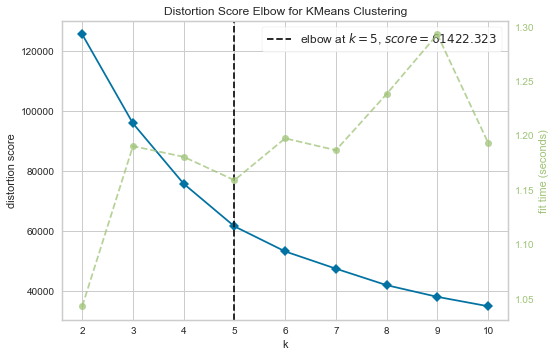

61422.32294852292

In [59]:
from sklearn.cluster import KMeans


elbow=KElbowVisualizer(KMeans(),k=10)
elbow.fit(X_pca)
elbow.show()
elbow.elbow_score_


In [60]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

In [61]:
import matplotlib.pyplot as plt

In [62]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [63]:
from sklearn.cluster import KMeans

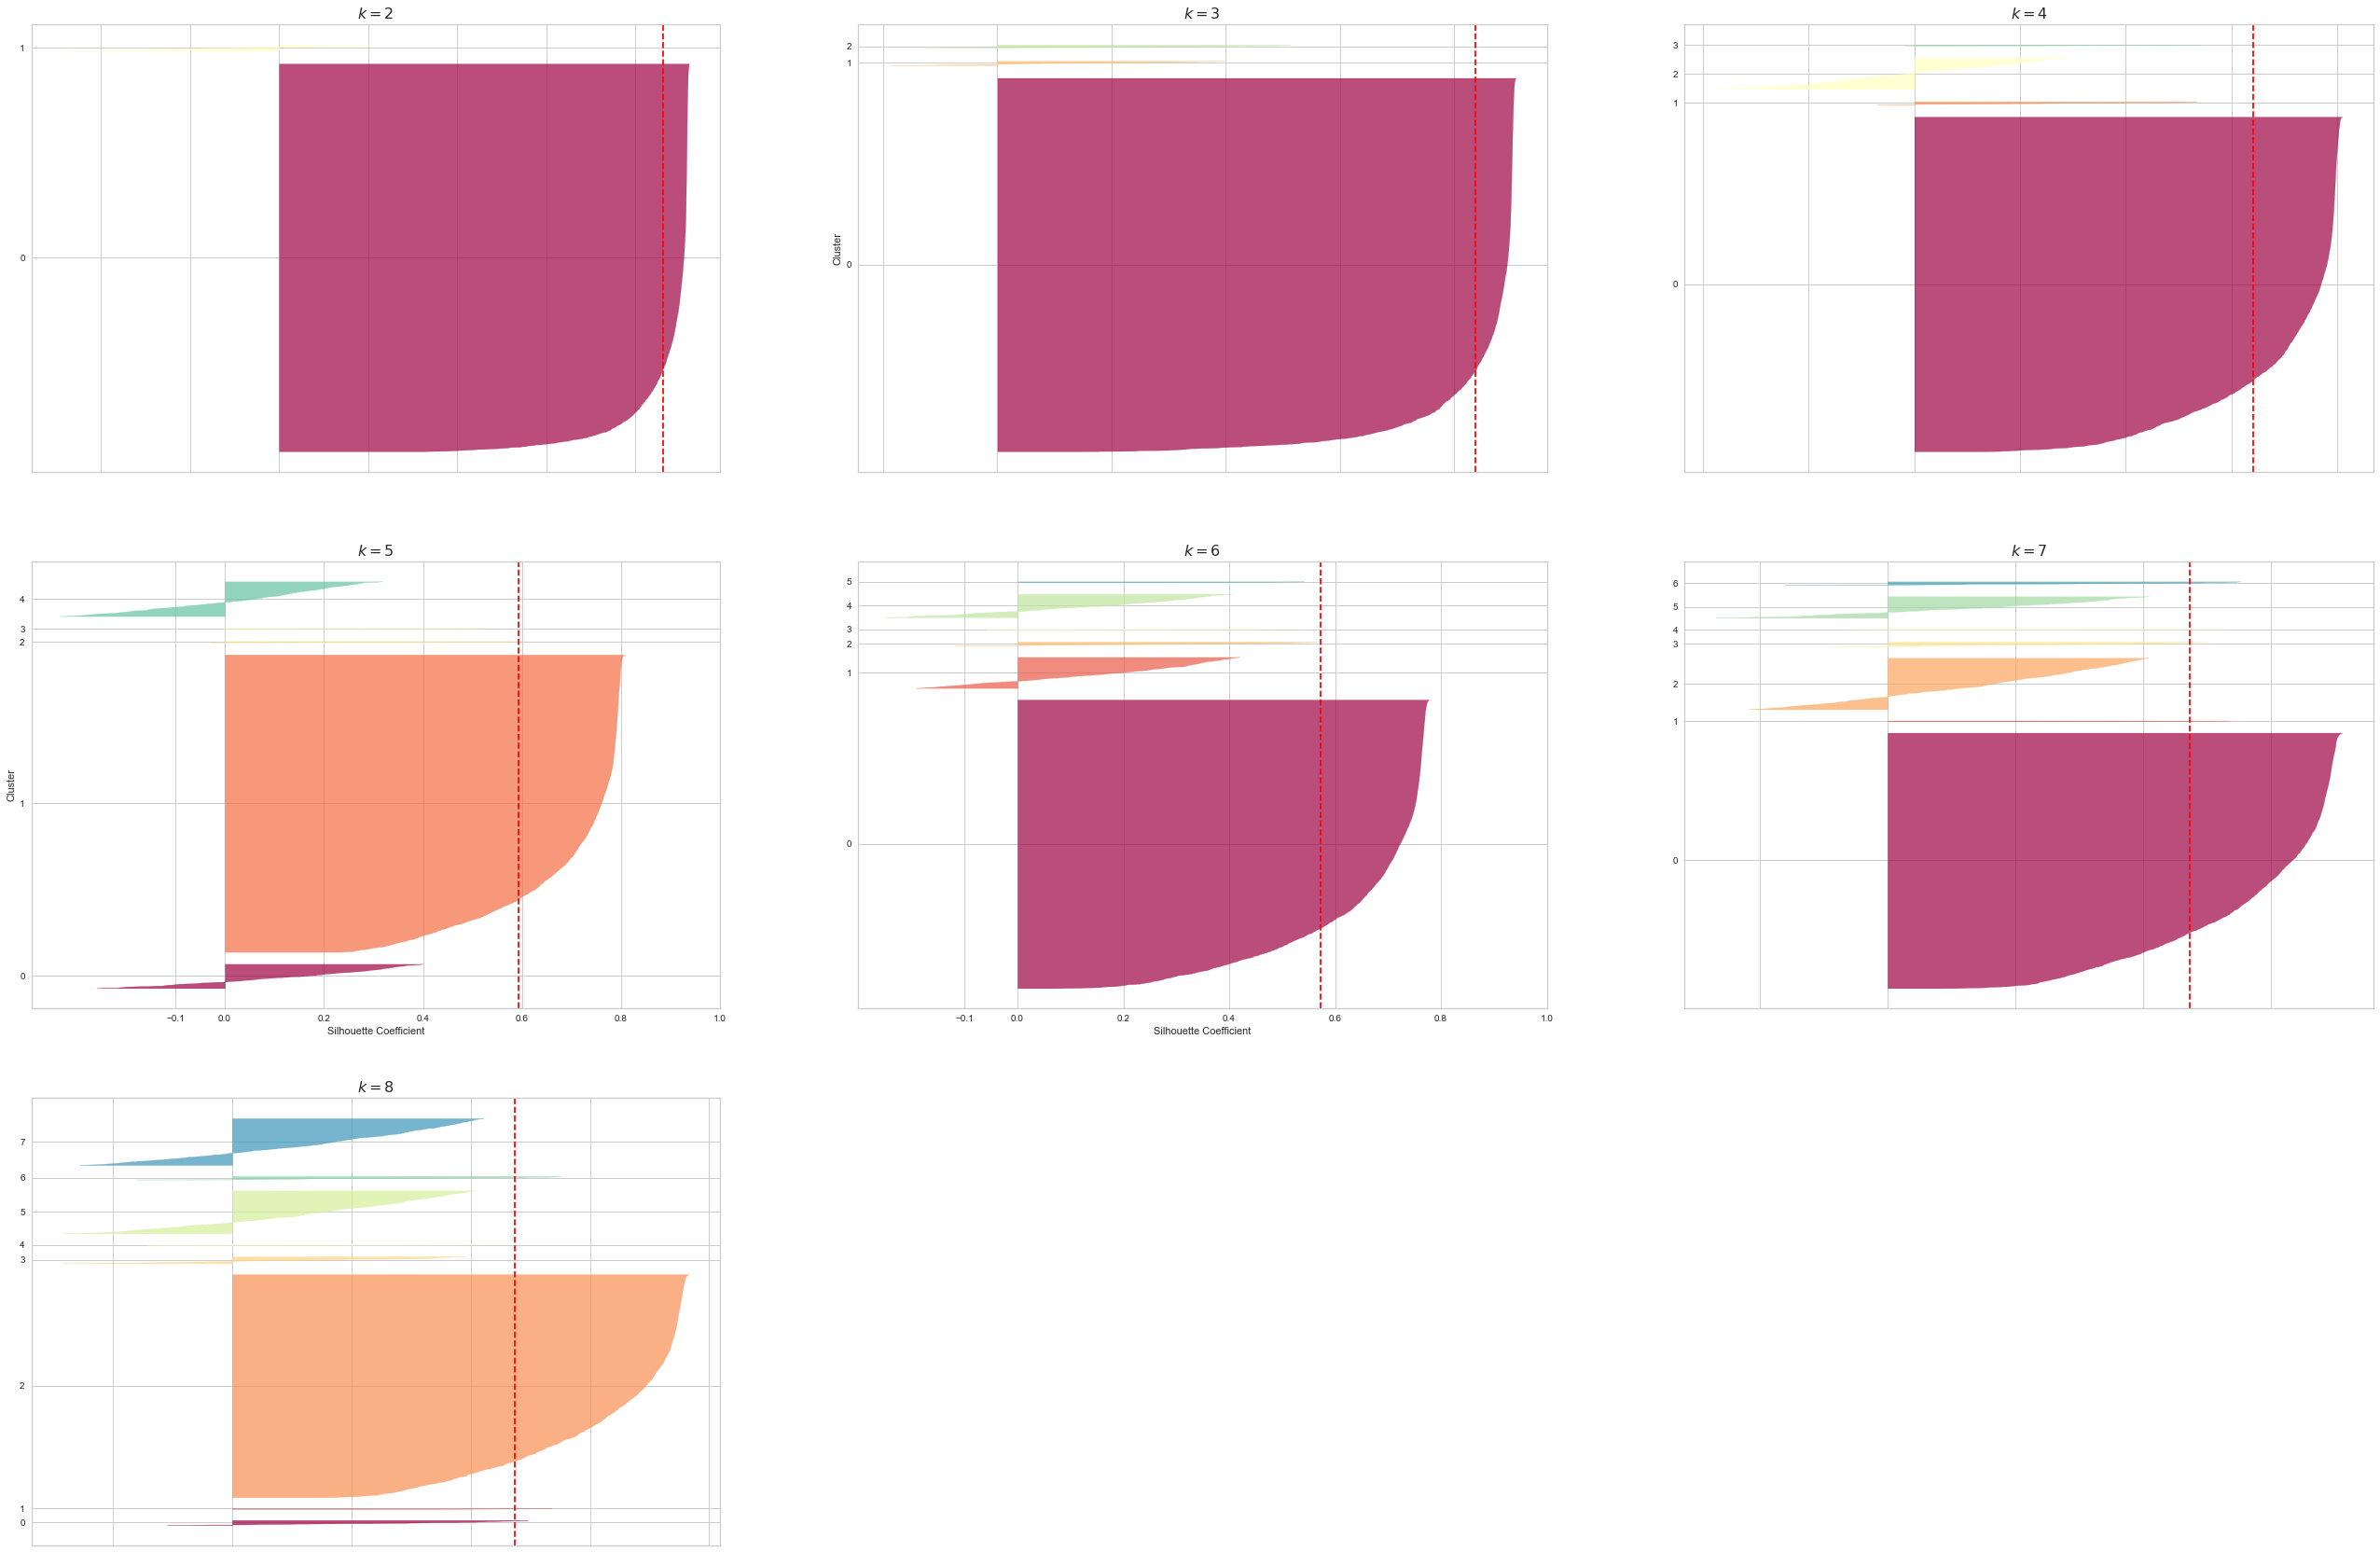

In [64]:
# Plot Silhoutte Graph

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_pca)
                for k in range(1, 9)]

silhouette_scores = [silhouette_score(X_pca, model.labels_)
                     for model in kmeans_per_k[1:]]


plt.figure(figsize=(45,30))

for k in range(2, 9):
    plt.subplot(3, 3, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_pca, y_pred)

    padding = len(X_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [65]:
kmeans=KMeans(n_clusters=8,random_state=212)

In [66]:
kmeans.fit(X_pca)

KMeans(random_state=212)

In [67]:
kmeans.labels_

array([6, 6, 6, ..., 6, 0, 0])

In [68]:
import seaborn as sns
import plotly_express as px

<AxesSubplot:>

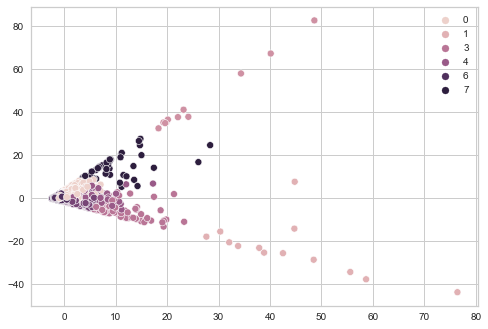

In [69]:
X_2d=PCA(n_components=2,random_state=666).fit_transform(X_scaled)
sns.scatterplot(x=X_2d[:,0],y=X_2d[:,1],hue=kmeans.labels_)

In [70]:
X_3d=PCA(n_components=3,random_state=69).fit_transform(X_scaled)

In [79]:
data['cluster']=kmeans.labels_

In [80]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'cluster'],
      dtype='object')

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

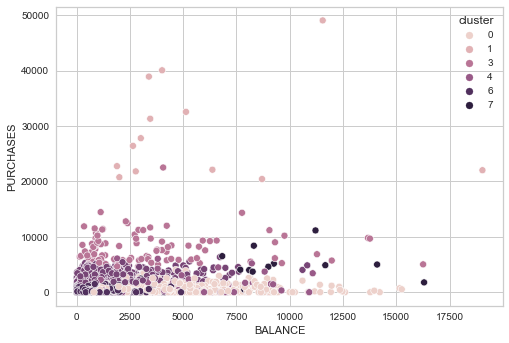

In [81]:
sns.scatterplot(x='BALANCE',y='PURCHASES',data=data,hue='cluster')